### Analyzing Sensor Data 

## Internet of Things

# Moving from Data to Insights

Instructor: Ram Narasimhan

The Internet of Things (IoT) has brought us a lot of data. These are possible thanks to the 1000's of devices, smart meters, sensors and instrumented machines all around us.
One challenge for any Data Analytics engineer is to make sense of the data that is now ubiquitous.

In this exercise, we will take one instrumented data set and we'll try to analyze that data set to gain some insights. In this case, the data set comes from an Android smart phone.

To work through this exercise, you will need the data file `android_phonedata.csv`

Read the data and try to answer the questions that follow. (SOLUTIONS will be provided in a separate notebook.)


### <div class="alert alert-block alert-warning">  We would like to analyze our personal phone usage history. The data comes from Bandicoot (MIT) for an Android Smartphone.</div>



## <div class="alert alert-block alert-success">Thought Question: Before reading further, things about this: What are some of the questions that you would like ask about your own phone usage?</div>

In [2]:
import numpy as np #load all needed modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#will create plots in the notebook itself
%matplotlib inline 


In [3]:
df = pd.read_csv("data/android_phonedata.csv") 
df.head()

,interaction,direction,correspondent_id,datetime,call_duration,antenna_id
0,call,out,88ad215ab537b07ca2f8beb13d51cd5175e4217f,2016-12-21 00:25:30,4.0,NaN
1,call,out,88ad215ab537b07ca2f8beb13d51cd5175e4217f,2016-12-21 00:25:56,42.0,NaN
2,call,out,18452df8a2654696b08897d66b3ebfda36d3ad60,2016-12-21 00:30:43,NaN,NaN
3,call,out,18452df8a2654696b08897d66b3ebfda36d3ad60,2016-12-21 00:30:49,NaN,NaN
4,call,out,18452df8a2654696b08897d66b3ebfda36d3ad60,2016-12-21 00:31:15,3.0,NaN


In [4]:
df.tail()

,interaction,direction,correspondent_id,datetime,call_duration,antenna_id
2529,text,out,88ad215ab537b07ca2f8beb13d51cd5175e4217f,2017-09-23 21:56:19,NaN,NaN
2530,text,in,88ad215ab537b07ca2f8beb13d51cd5175e4217f,2017-09-23 21:56:43,NaN,NaN
2531,text,out,89914c2eeba5b78ab9e38baa785fc4b03c9d8193,2017-09-23 22:49:49,NaN,NaN
2532,text,in,89914c2eeba5b78ab9e38baa785fc4b03c9d8193,2017-09-24 00:37:30,NaN,NaN
2533,call,in,89914c2eeba5b78ab9e38baa785fc4b03c9d8193,2017-09-24 07:29:16,NaN,NaN


**There is a lot of useful information here.**

But the antenna_id column seems useless. Let's drop it.

In [5]:
df.antenna_id.unique() #verifying that it is all NaN

array([nan])

In [6]:
df.drop(labels= "antenna_id", axis=1, inplace=True)

# Question how many categorical Columns do you see?

# What sorts of plots can we create with these columns?

In [7]:
categories = df.groupby('interaction')
categories.size()

interaction
call     500
text    2034
dtype: int64

In [8]:
categories2 = df.groupby('direction')
categories2.size()

direction
in     1262
out    1272
dtype: int64

There are two categorical colums, Interaction and direction

# Q1: How big is the data set? `pd.describe` the dataset.

In [9]:
df.describe

<bound method NDFrame.describe of      interaction direction                          correspondent_id  \
0           call       out  88ad215ab537b07ca2f8beb13d51cd5175e4217f   
1           call       out  88ad215ab537b07ca2f8beb13d51cd5175e4217f   
2           call       out  18452df8a2654696b08897d66b3ebfda36d3ad60   
3           call       out  18452df8a2654696b08897d66b3ebfda36d3ad60   
4           call       out  18452df8a2654696b08897d66b3ebfda36d3ad60   
5           call       out  88ad215ab537b07ca2f8beb13d51cd5175e4217f   
6           call        in  88ad215ab537b07ca2f8beb13d51cd5175e4217f   
7           call       out  88ad215ab537b07ca2f8beb13d51cd5175e4217f   
8           call       out  da02b5d0a2ed9d5ab271769f692ab641b43893d3   
9           call       out  18452df8a2654696b08897d66b3ebfda36d3ad60   
10          call        in  88ad215ab537b07ca2f8beb13d51cd5175e4217f   
11          call        in  88ad215ab537b07ca2f8beb13d51cd5175e4217f   
12          text       out  88

### Q2: How many incoming and outgoing activities are there? (in this dataset)

In [10]:
categories2 = df.groupby('direction')
categories2.size()

direction
in     1262
out    1272
dtype: int64

# Q3: Create a histogram of `Call Duration`

What insights do you get from this histogram?

Call_duration is numeric column. So we can immediately try a histogram.
In seaborn, this is called a DISTRIBUTION PLOT. (distplot)


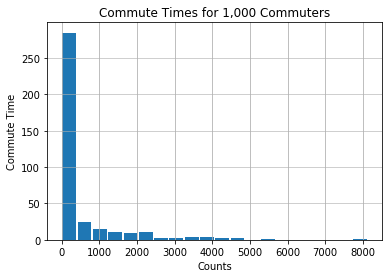

In [12]:
df['call_duration'].plot.hist(grid=True, bins=20, rwidth=0.9)
plt.title('Call duration, distribution plot')
plt.xlabel('Counts')
plt.ylabel('Call duration')
plt.grid(axis='y', alpha=0.75)

# Q3B. Plot a histogram of only those calls that are of non-zero duration. 
We do this because we don't have to count missed calls, text messages etc.

# Q3C. Plot a histogram of only those calls that are over a certain duration. 
For example, you could look at the distribution of calls that are greater than 60 seconds.


### Q4: Store all the calls that are more than 60 seconds in a new df

Create a Box plot that shows how these (longer) `call durations` are distributed?

### Q5: Find the total minutes of incoming and total minutes of outgoing call


### Q6: How many distinct devices (`correspondent_id`) has this person interacted with?

** Q7: From the dataset, what is the total time spent by this Android phone owner, with each of the correspondents?**

To do, you will have to compute the total time spent with each correspondent, and then plot it as a bar plot.


### Task: Set df['datetime'] as the index and delete the 'datetime' column

In other words, convert the timestamp to `datetime` and make it the index for the dataframe.

Once we have the datetime column as the DataFrame's INDEX, several time-based manipulations becomes available to us. (This is one reason that Pandas is so powerful for Time Series analysis.)

Pandas has a special object type called datetime, and if a column is for that type, we can do a lot of time relating slicing...

# Question for the class:

** Q8: Using the index, subset the data frame to include just the calls for 3 months (Jan, Feb and March of 2017) **


### Q9: Create a Time Series plot of the Call Duration.

In other words, the x-axis should be the time (date). The Y axis will be the call durations of each call made at that time. Make it a scatter plot or plot bars (your choice) so that the data is clearly conveyed to the viewer.

# Extra Questions for you to try out.


- Q9: Who does this person call the most?
- Q10: What is the calling pattern by DOW? by TOD? (day of week, time of day)
- Q11: Do people call this person more frequently, or does this person call them more?! (Incoming calls vs Outgoing calls)